# TENSORES Y AUTOVALORES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"]=20,10
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [2]:
mass = pd.read_excel(r'/home/nicole/Documents/books/modelado y simulación/trabajo3 tensores y autovalores/datosmasas.xlsx')

In [3]:
#Separar la columna por comas
masa = pd.DataFrame(mass)
masa = mass['particula,masas,x,y,z'].str.split(',', expand=True)
masa.columns = ['partícula','masa','x','y','z'] #set headers
masa

,partícula,masa,x,y,z
0,1,2.00,-53.00,79.00,-91.00
1,2,2.00,13.00,-142.00,-177.00
2,3,2.00,-109.00,-103.00,-120.00
3,4,2.00,4.00,-96.00,110.00
4,5,4.00,222.00,-22.00,-236.00
...,...,...,...,...,...
1528,1529,3.00,1646.00,1612.00,-30.00
1529,1530,2.00,1610.00,1650.00,-145.00
1530,1531,5.00,1626.00,1537.00,96.00
1531,1532,2.00,1390.00,1480.00,160.00


In [4]:
masa.dtypes

partícula    object
masa         object
x            object
y            object
z            object
dtype: object

In [5]:
masa = masa.astype(float) #objects to float
masa.dtypes

partícula    float64
masa         float64
x            float64
y            float64
z            float64
dtype: object

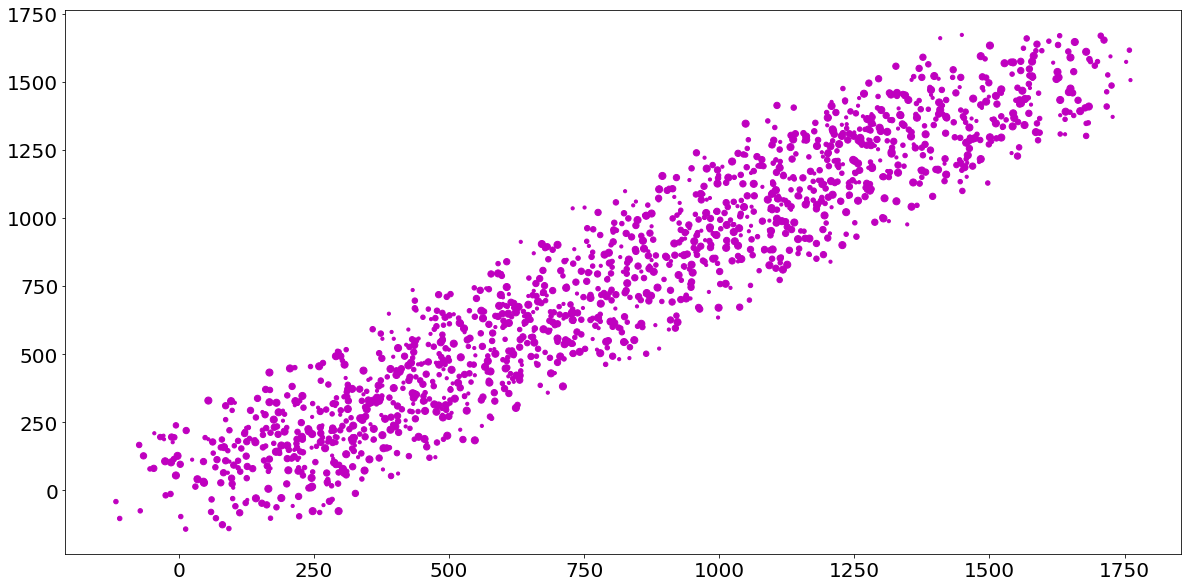

In [6]:
plt.scatter(masa['x'], masa['y'], s= 10 * masa['masa'], color = 'm')
plt.show()

# Para el caso 2D

Momento zero, valor total de la variable del sistema
$\mu_0 = \sum_{i=1}^N m_i$

In [7]:
# sumas = masa.sum(axis = 0, skipna = True) 
mu_0 = masa['masa'].sum() 
mu_0

4627.0

## Primer momento
Promedio pesado de la variable $\mu_1 = \sum_{i=1}^Nm_i(|x)_i-|\bar{x}))$

In [8]:
means = masa[['x','y','z']].mean()
means

x    821.973907
y    775.870189
z     15.063275
dtype: float64

In [9]:
mu_11x = (sum(masa['masa'] * (masa['x'] - means['x'])))
mu_11y = (sum(masa['masa'] * (masa['y'] - means['y'])))
# mu_11z = sum(masa['masa'] * (masa['z'] - means['z']))

mu_11x, mu_11y

(17773.73059360568, 4850.634703204753)

In [10]:
#Centro de masa
mu_1x = (sum(masa['masa'] * masa['x']))/mu_0
mu_1y = (sum(masa['masa'] * masa['y']))/mu_0
mu_1x, mu_1y

(825.8152150421439, 776.9185217203371)

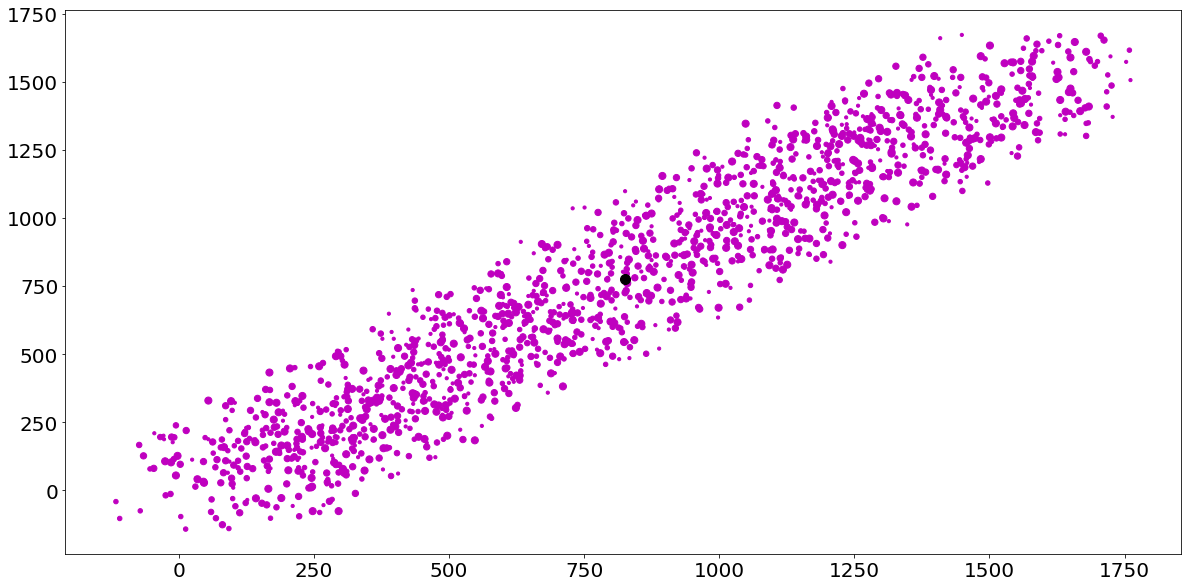

In [11]:
plt.scatter(masa['x'], masa['y'], s= 10 * masa['masa'], color = 'm')
plt.scatter(mu_1x, mu_1y, color = 'k', s=100)

## Segundo momento 

$$\mu_2 = \left(\begin{array}{ll}
\sum_{i=1}^Nm_i(|x)_i-|\bar{x}))^2 & \sum_{i=1}^Nm_i(|x)_i-|\bar{x}))(|y)_i-|\bar{y}))\\
\sum_{i=1}^Nm_i(|y)_i-|\bar{y})(|x)_i-|\bar{x})) & \sum_{i=1}^Nm_i(|y)_i-|\bar{y})^2)
\end{array}\right)$$

In [12]:
numbers = masa.iloc[:,1:]

equis = numbers['x']
ye = numbers['y']
#zeta = numbers['z']

pesos = numbers['masa']

data = np.array([equis,ye])

Calculando la matriz con la función cov

In [13]:
covMatrix2D = np.cov(data,bias=True, fweights=pesos) #da lo mismo que usando aweights

covMatrix2D

array([[207161.35487548, 197049.47294923],
       [197049.47294923, 208268.88875788]])

In [14]:
w, v = np.linalg.eig(covMatrix2D) #calculamos eigenvalores y eigenvectores

print(w)
print(v)                          #no son los vectores cartesianos

[ 10664.87074505 404765.37288831]
[[-0.70809967 -0.7061125 ]
 [ 0.7061125  -0.70809967]]


Calculando la matriz con la formula que hay en el pdf

In [15]:
x_promedio = sum(equis)/1533
new_x = equis - x_promedio
entrada_11 = sum(pesos * new_x**2)
entrada_11

958603863.3765317

In [16]:
y_promedio = sum(ye)/1533
new_y = ye - y_promedio
entrada_22 = sum(pesos * new_y**2)
entrada_22

963665233.3609312

In [17]:
entrada_12 = sum(pesos*new_x*new_y)
entrada_12

911766544.1163656

In [18]:
mat_cov = [[entrada_11,entrada_12],
          [entrada_12,entrada_22]]
mat_cov

[[958603863.3765317, 911766544.1163656],
 [911766544.1163656, 963665233.3609312]]

In [19]:
m_autoval, m_autovect = np.linalg.eig(mat_cov)

print(m_autoval)
print(m_autovect)  #Obtengo los mismos autovalores y autovectores que con la función... nice

[4.93644922e+07 1.87290460e+09]
[[-0.70808741 -0.70612479]
 [ 0.70612479 -0.70808741]]


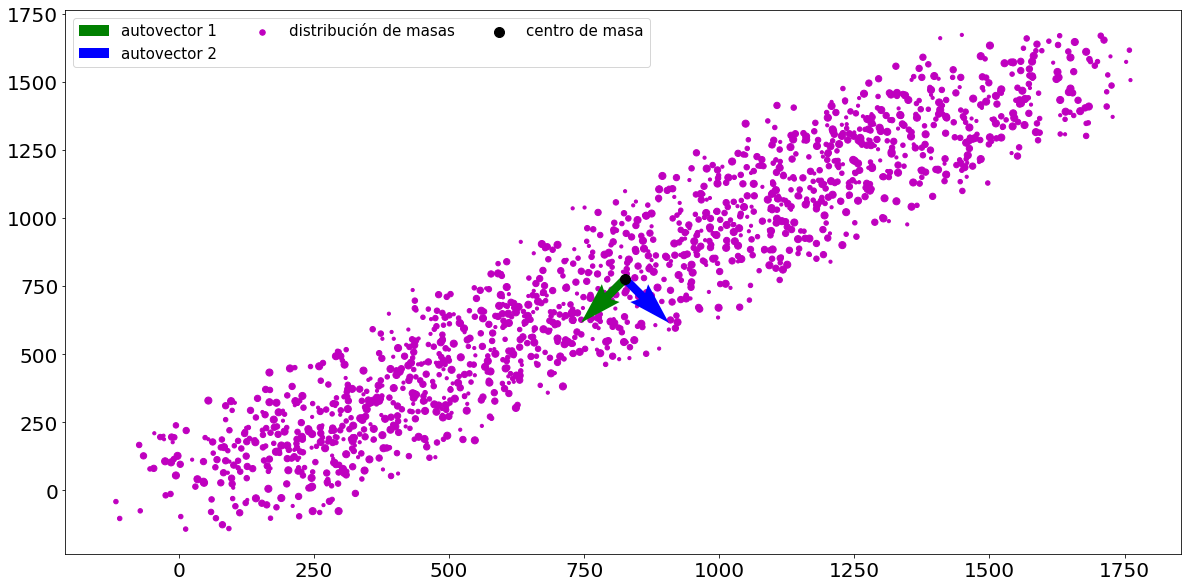

In [20]:
V = np.array([v[0],v[1]])
origin = [mu_1x], [mu_1y] # origin point

mas   = plt.scatter(masa['x'], masa['y'], s= 10 * masa['masa'], color = 'm')
vec1  = plt.quiver(*origin, V[0,0], V[0,1], color=['g'])
vec2  = plt.quiver(*origin, V[1,0], V[1,1], color=['b'])
c_mas = plt.scatter(mu_1x, mu_1y, color = 'k', s=100)


plt.legend((vec1, vec2, mas, c_mas),
           ('autovector 1', 'autovector 2', 'distribución de masas', 'centro de masa'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=15)

plt.savefig('2D.png')
plt.show()


Mariz de transformación de base canónica a autovalores y autovectores

$$\left(\begin{matrix}
1&0\\
0&1\end{matrix}\right)\left(\begin{matrix}
v_{1x}&v_{2x}\\
v_{1y}&v_{2y}\end{matrix}\right)$$

Pero esto da la misma $v$, no?

In [21]:
canon2D = [[1,0],
            [0,1]]
canon2D = np.array(canon2D, dtype=float)
np.dot(canon2D,v)

array([[-0.70809967, -0.7061125 ],
       [ 0.7061125 , -0.70809967]])

Sip, da la misma matriz $v$.

# El caso 3D

El momento cero es el mismo.

El primer momento:

In [22]:
mu_11z = sum(masa['masa'] * (masa['z'] - means['z']))

mu_11x, mu_11y, mu_11z

(17773.73059360568, 4850.634703204753, 2036.2283105021615)

In [23]:
mu_1z = (sum(masa['masa'] * masa['z']))/mu_0 #centro de masa

center_of_mass = [[mu_1x], [mu_1y], [mu_1z]]

center_of_mass

[[825.8152150421439], [776.9185217203371], [15.503349902744759]]

Segundo momento

In [24]:
zeta = numbers['z']

data3D = np.array([equis,ye,zeta])

covMatrix3D = np.cov(data3D,bias=True, fweights=pesos) 

covMatrix3D

array([[207161.35487548, 197049.47294923,  -1543.55924699],
       [197049.47294923, 208268.88875788,   -417.02987618],
       [ -1543.55924699,   -417.02987618,  22010.65932528]])

In [25]:
vals, vects = np.linalg.eig(covMatrix3D) #eigenvalores y eigenvectores

print(vals)

print(vects)

[404770.38610367  10608.92202512  22061.59482984]
[[ 0.70611307  0.70654139 -0.04694255]
 [ 0.70808985 -0.7042117   0.05190995]
 [-0.00361904  0.06989384  0.99754787]]


<IPython.core.display.Javascript object>


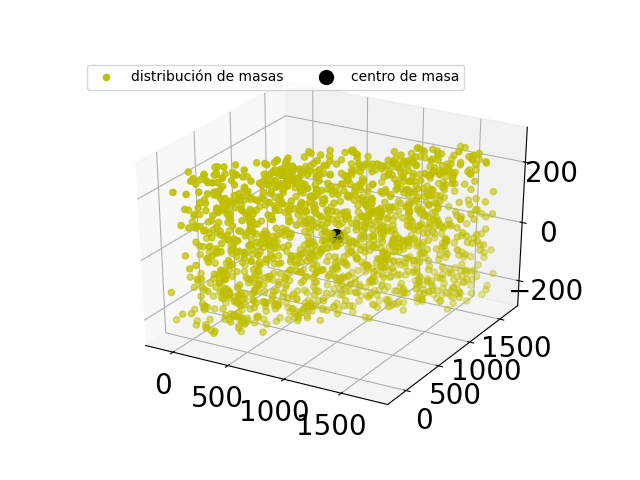

In [26]:
%matplotlib notebook

V3 = np.array([vects[0],vects[1], vects[2]])
origin = [mu_1x], [mu_1y], [mu_1z]

X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip(V3[0,:],V3[1,:],V3[2,:])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mas   = ax.scatter(masa['x'], masa['y'], masa['z'], c = 'y', marker='o')
eigvecs = ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.01)
c_mas = ax.scatter(mu_1x, mu_1y, mu_1z, color = 'k', s=100)


plt.legend(( mas, c_mas),
           ('distribución de masas', 'centro de masa'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)

plt.show()

<IPython.core.display.Javascript object>


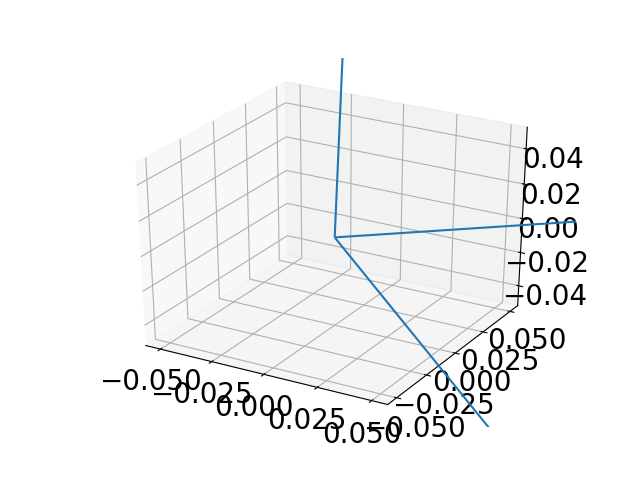

In [27]:
p0 = V3[0,:]
p1 = V3[1,:]
p2 = V3[2,:]

origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip(p0,p1,p2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.01)
plt.show()

In [28]:
v, V3

(array([[-0.70809967, -0.7061125 ],
        [ 0.7061125 , -0.70809967]]),
 array([[ 0.70611307,  0.70654139, -0.04694255],
        [ 0.70808985, -0.7042117 ,  0.05190995],
        [-0.00361904,  0.06989384,  0.99754787]]))